In [1]:
# !pip install numpy pandas tensorflow yfinance pandas_datareader scikit-learn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Getting Data

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02 00:00:00+00:00,24.373953,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05 00:00:00+00:00,23.687298,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06 00:00:00+00:00,23.689541,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07 00:00:00+00:00,24.021717,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08 00:00:00+00:00,24.944689,27.972500,28.037500,27.174999,27.307501,237458000


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_12244\1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,27.332500,27.860001,26.837500,27.847500,212818400
1,26.562500,27.162500,26.352501,27.072500,257142000
2,26.565001,26.857500,26.157499,26.635000,263188400
3,26.937500,27.049999,26.674999,26.799999,160423600
4,27.972500,28.037500,27.174999,27.307501,237458000


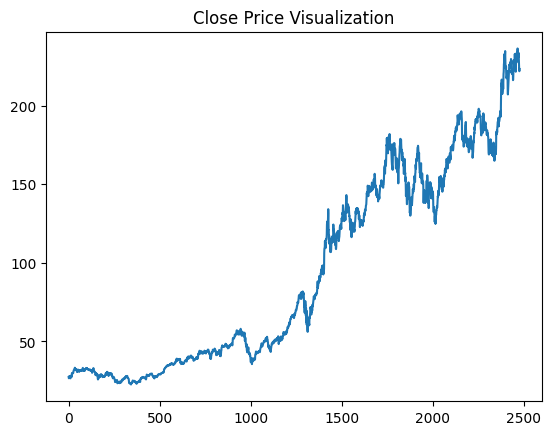

In [5]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2473,223.011300
2474,223.339200
2475,223.496801
2476,223.586200


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

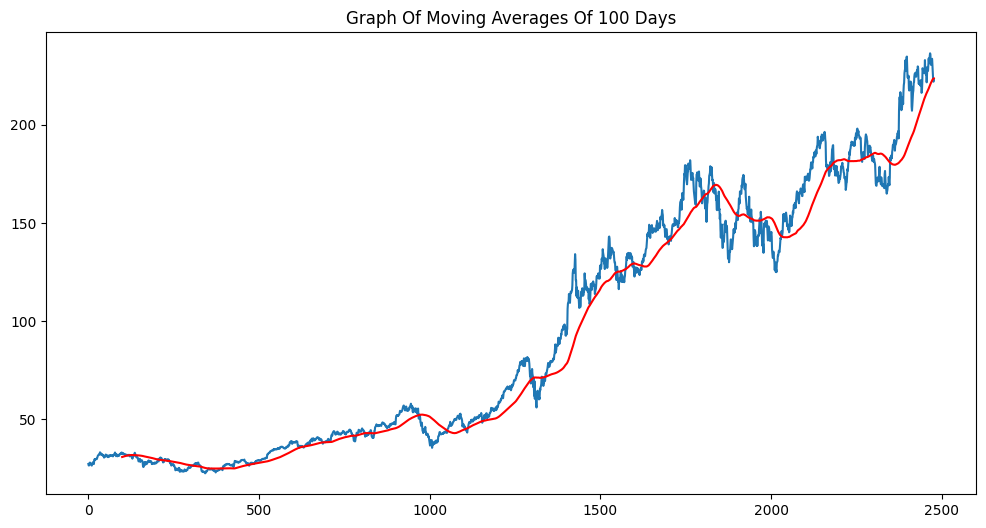

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2473,201.76490
2474,201.98105
2475,202.15245
2476,202.30470


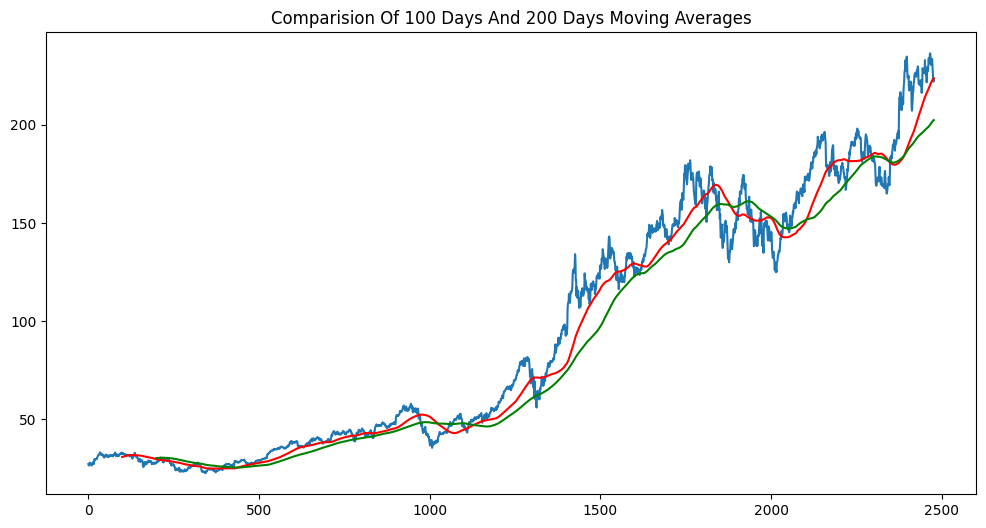

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')
plt.show()

In [10]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1734, 7)
(744, 7)


In [11]:
train

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02 00:00:00+00:00,24.373953,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05 00:00:00+00:00,23.687298,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06 00:00:00+00:00,23.689541,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07 00:00:00+00:00,24.021717,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08 00:00:00+00:00,24.944689,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...,...,...
1729,2021-11-12 00:00:00+00:00,147.735031,149.990005,150.399994,147.479996,148.429993,63804000
1730,2021-11-15 00:00:00+00:00,147.744873,150.000000,151.880005,149.429993,150.369995,59222800
1731,2021-11-16 00:00:00+00:00,148.729813,151.000000,151.490005,149.339996,149.940002,59256200


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
train_close = train.iloc[:, 2:3].values
test_close = test.iloc[:, 2:3].values

In [14]:
train_close

array([[ 27.33250046],
       [ 26.5625    ],
       [ 26.56500053],
       ...,
       [151.        ],
       [153.49000549],
       [157.86999512]])

In [15]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03509259],
       [0.0294009 ],
       [0.02941939],
       ...,
       [0.94921835],
       [0.96762398],
       [1.        ]])

In [39]:
data_training_array.shape[0]

1734

In [51]:
x_train = []
y_train = [] 

rem = len(data_training_array)%130
data_training_array = data_training_array[rem:]

for i in range(0, data_training_array.shape[0],130):
    x_train.append(data_training_array[i: i+101])
    y_train.append(data_training_array[i+101: i+131])

x_train = np.array(x_train)
y_train = np.array(y_train)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (13,) + inhomogeneous part.

In [50]:
x_train.shape

(13, 101, 1)

In [18]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\projects\stock_price\stock_price\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train ,epochs = 10)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - MAE: 0.0465 - loss: 0.0056
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - MAE: 0.0525 - loss: 0.0063
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - MAE: 0.0437 - loss: 0.0053
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - MAE: 0.0433 - loss: 0.0043
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - MAE: 0.0397 - loss: 0.0039
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - MAE: 0.0369 - loss: 0.0034
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - MAE: 0.0366 - loss: 0.0033
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - MAE: 0.0641 - loss: 0.0091
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - MAE: 0.0393 - loss: 0.0036
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - MAE: 0.0342 - loss: 0.0027


In [37]:
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
input_data = scaler.fit_transform(final_df)
input_data

(844, 1)

In [31]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(744, 100, 1)
(744,)


In [33]:
y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


In [34]:
scaler.scale_

array([0.00897183])

In [35]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

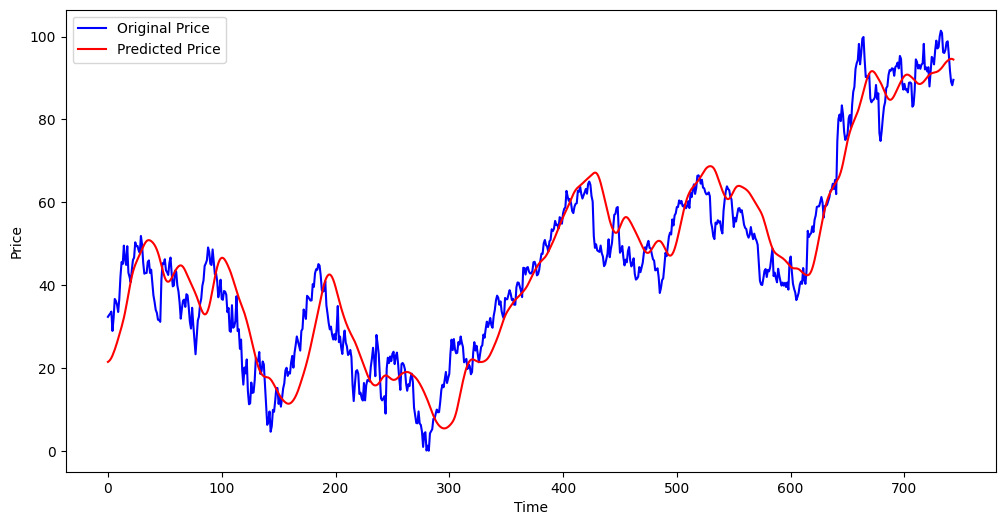

In [36]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()